In [1]:
from hrgeos import HrgEosIntegration

In [2]:
proton_calculator = HrgEosIntegration("p")
pi0_calculator = HrgEosIntegration("pi0")

In [3]:
print("proton_mass", proton_calculator.particle.mass)
print("pi0_mass", pi0_calculator.particle.mass)

proton_mass 0.93827208816
pi0_mass 0.134976827767685


In [4]:
temper = 0.155
pi0_density = pi0_calculator.density_n(temper)
proton_density = proton_calculator.density_n(temper)

print("ratio pion / proton=", pi0_density / proton_density)

ratio pion / proton= 16.10203201310647


# 测试函数，定义一个质量为0的强子
###### 由于PDG API不可能有这种东西，所以继承之前的类然后重载构造函数
# 显然有如下公式
$$
P = \frac{\epsilon}{3}
$$

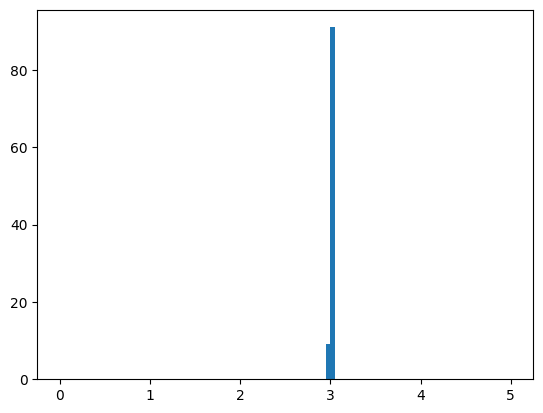

In [5]:
import numpy as np
class ZeroMass(HrgEosIntegration):
    def __init__(self):
        super().__init__("p")
        class Particle:
            def __init__(self):
                self.quantum_J = "0"
                self.is_boson = True
                self.mass = 0.0
        self.particle = Particle()
        
Tarr = np.linspace(0.01, 0.2, 100)

particle_zero_mass = ZeroMass()

ed = [particle_zero_mass.energy_density_e(i) for i in Tarr]

pr = [particle_zero_mass.pressure_p(i) for i in Tarr]

import matplotlib.pyplot as plt

_ = plt.hist(np.array(ed) / np.array(pr), range=(0, 5), bins=100)

# $\pi$介子气体

100%|██████████| 100/100 [02:13<00:00,  1.33s/it]


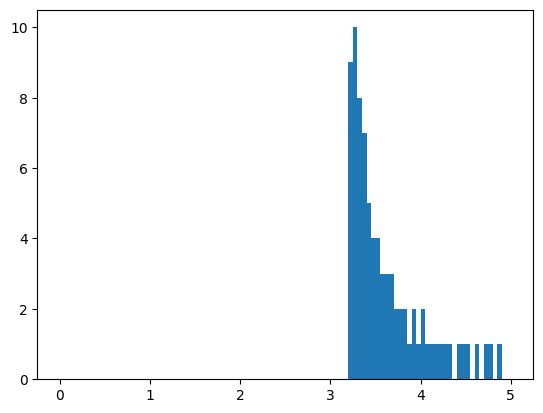

In [6]:
pion = HrgEosIntegration("pi0")

pion_ed = []
pion_pr = []

from tqdm import tqdm
for i in tqdm(Tarr):
    pion_ed.append(pion.energy_density_e(i))
    pion_pr.append(pion.pressure_p(i))

_ = plt.hist(np.array(pion_ed) / np.array(pion_pr), bins=100, range=(0, 5))

# 如上，显然不太符合3倍的公式